In [51]:
from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

## NeuralNetwork

In [52]:
params = [
    [[1, 4], [2, 6]], # real feature
    [[5, 4], [10, 6]] # confounder
    ]

With the test_network class it's easy to test new combinations parameters

### No confounder

Training took  1.7974843978881836 s


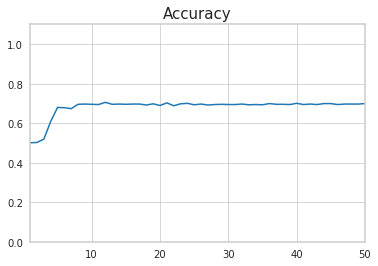

With mean accuracy= 0.681882640586797


In [53]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=0, test_confounding=0, params=params)
acc, loss = c.train(epochs=50, batch_size=32, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Train- and testset confounded

Training took  1.8411595821380615 s


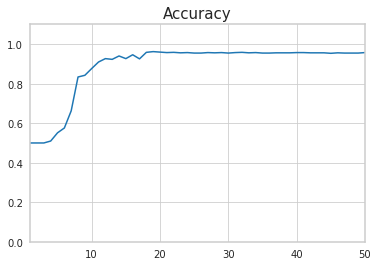

With mean accuracy= 0.8882640586797066


In [54]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=1, params=params)
acc, loss = c.train(epochs=50, batch_size=32, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Trainset confounded, testset 50% confounding

Training took  1.7623624801635742 s


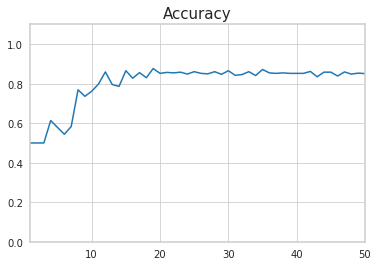

With mean accuracy= 0.8005867970660147


In [55]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=0.5, params=params)
acc, loss = c.train(epochs=50, batch_size=32, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Trainset confounded, testset unconfounded

Training took  1.8914134502410889 s


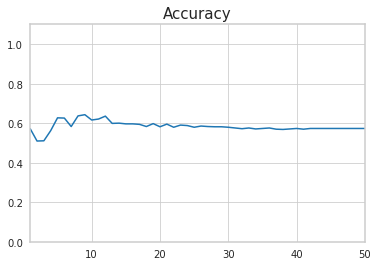

With mean accuracy= 0.5838875305623472


In [56]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=0, params=params)
acc, loss = c.train(epochs=50, batch_size=32, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (818, 2)


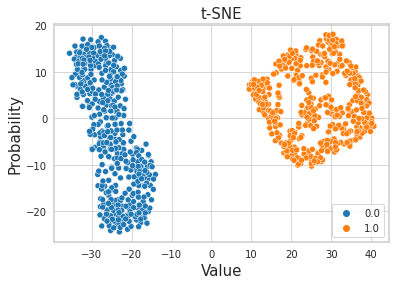

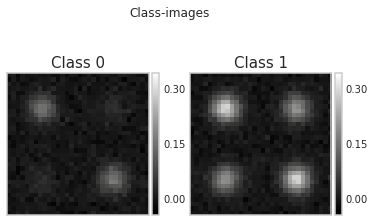

In [57]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)

### Accuracy vs. confounding strength in testset

In [58]:
total_acc, total_loss = [], []
for i in np.arange(0,1,0.02):
    model = Models.NeuralNetwork(32*32)
    c = CI.confounder(model=model)
    c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=i, params=params)
    acc, loss = c.train(epochs=50, batch_size=32, optimizer=torch.optim.Adam(model.parameters()))
    total_acc.append(np.mean(acc))
    total_loss.append(loss)

Training took  1.7722413539886475 s
Training took  1.7163333892822266 s
Training took  1.7398028373718262 s
Training took  1.6867353916168213 s
Training took  1.800044059753418 s
Training took  1.7414169311523438 s
Training took  1.7186834812164307 s
Training took  1.8383588790893555 s
Training took  1.8108093738555908 s
Training took  1.836214303970337 s
Training took  1.9308726787567139 s
Training took  1.8543989658355713 s
Training took  2.2049481868743896 s
Training took  1.9185056686401367 s
Training took  1.7973825931549072 s
Training took  1.9301426410675049 s
Training took  1.9668996334075928 s
Training took  1.8755223751068115 s
Training took  2.140916585922241 s
Training took  1.7769882678985596 s
Training took  1.731898307800293 s
Training took  1.8260722160339355 s
Training took  1.8681840896606445 s
Training took  1.8064417839050293 s
Training took  1.7602202892303467 s
Training took  1.7366013526916504 s
Training took  1.857774019241333 s
Training took  2.0814759731292725

<AxesSubplot:>

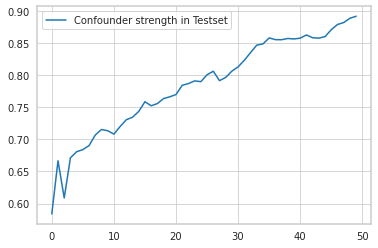

In [59]:
data = {'Confounder strength in Testset':total_acc}

data_df = pd.DataFrame(data)
sbs.lineplot(data=data_df, marker='.')